In [7]:
import pickle
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import random

setup

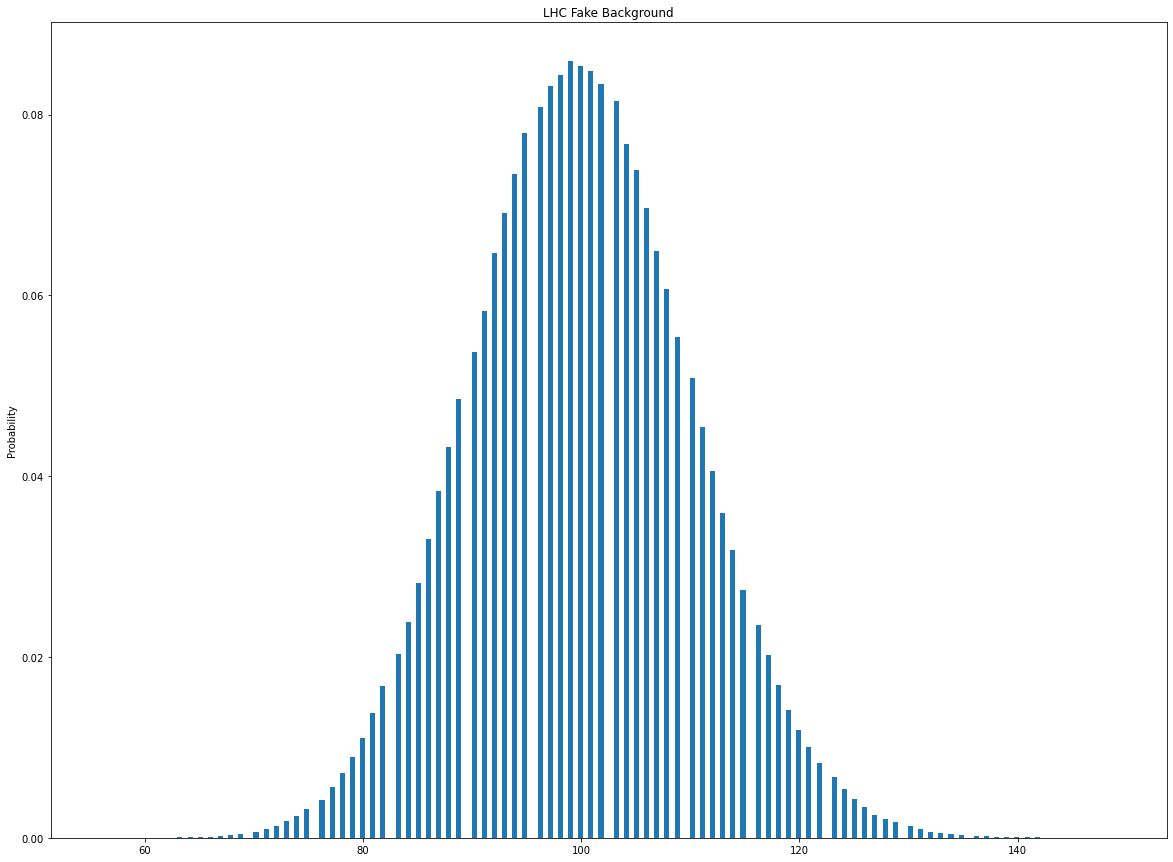

In [43]:
plt.rcParams["figure.figsize"] = (20,15)
mean = 100
LHC = stats.poisson.rvs(mean, size = 1000000)
plt.hist(LHC, 200,density=True)
plt.title("LHC Fake Background")
plt.ylabel('Probability')
plt.show()

problem 1

In [9]:
threshold = stats.poisson.isf(q=stats.norm.sf(5),mu=100,loc=0)
print("Threshold for 5 sigma is " +str(threshold))

Threshold for 5 sigma is 154.0


Problem 2



pick 8 as sigma

In [22]:
signal = stats.poisson.isf(q=stats.norm.sf(8),mu=100,loc=0)
signal

190.0

2.AHistogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

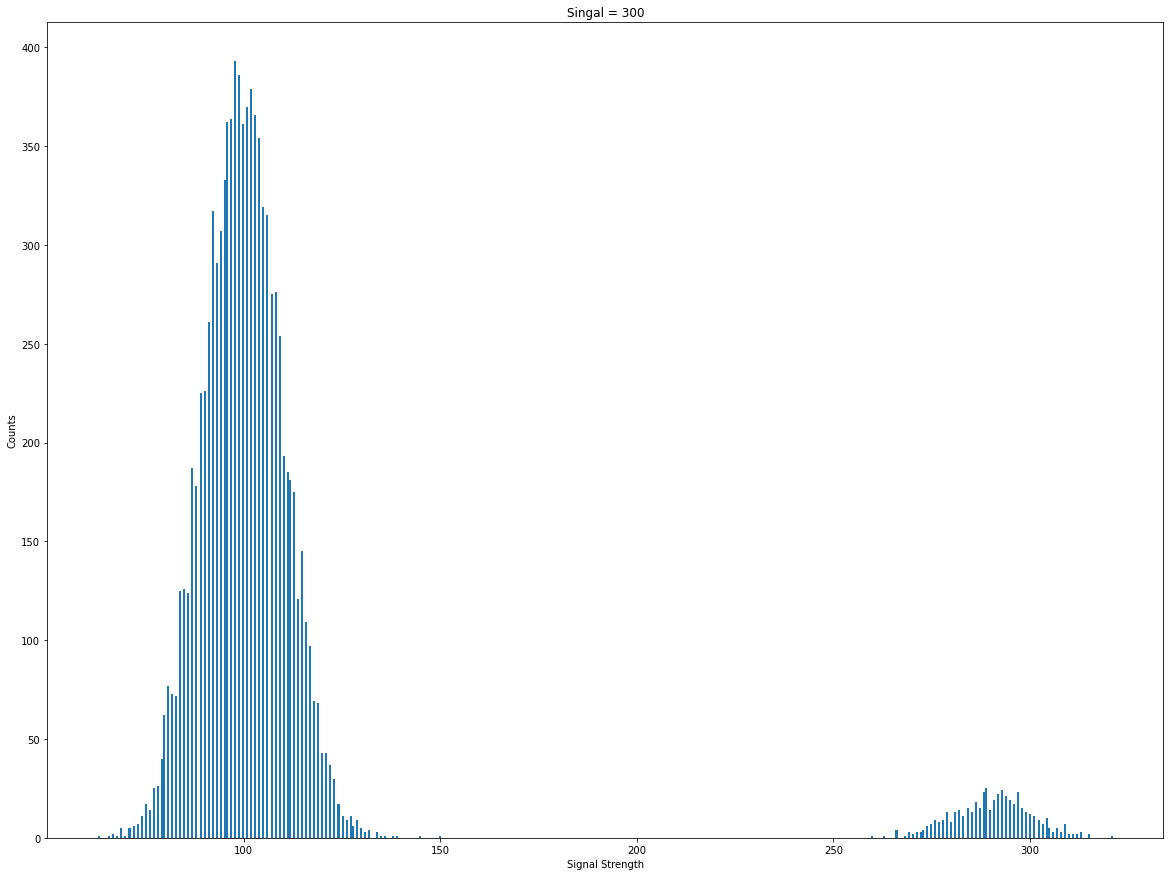

In [25]:
data = np.zeros(10000)
data[random.sample(range(1,10000),500)] = 190
signal = np.random.poisson(100,10000)+data
plt.hist(signal,bins=500)
plt.title("Singal = 300")
plt.xlabel("Signal Strength")
plt.ylabel("Counts");

mean is at 100 and 280

Both left and right part looks like a Gaussian distribution

2.B:Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

The observed signal is biased because the observed value equally likely to be stronger than the true injected signa.It is symmetric

Problem 3
Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5LaTeX: \sigmaσ (30LaTeX: \sigmaσ or more). You will want to follow the work you did for Homework 5 very closely.


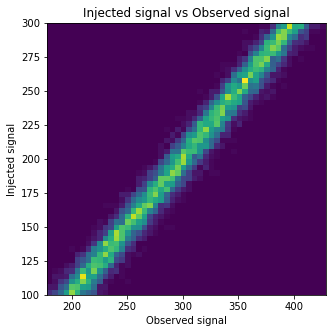

In [46]:
sigma = 8

noise = stats.poisson.rvs(mu=100, size=10000)
injected = np.linspace(100,300,10000)
observed = noise + injected

fig = plt.figure(figsize=(5,5))
h = plt.hist2d(observed, injected, bins=(50,50), density=True)
plt.title('Injected signal vs Observed signal')
plt.ylabel('Injected signal')
plt.xlabel('Observed signal')
plt.show()

a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data


 Data injected with different values of signals who ranges from 100 to 600.

b) For the same injected signal power as in problem 2, show that you get the same answer.


Text(0, 0.5, 'Probability')

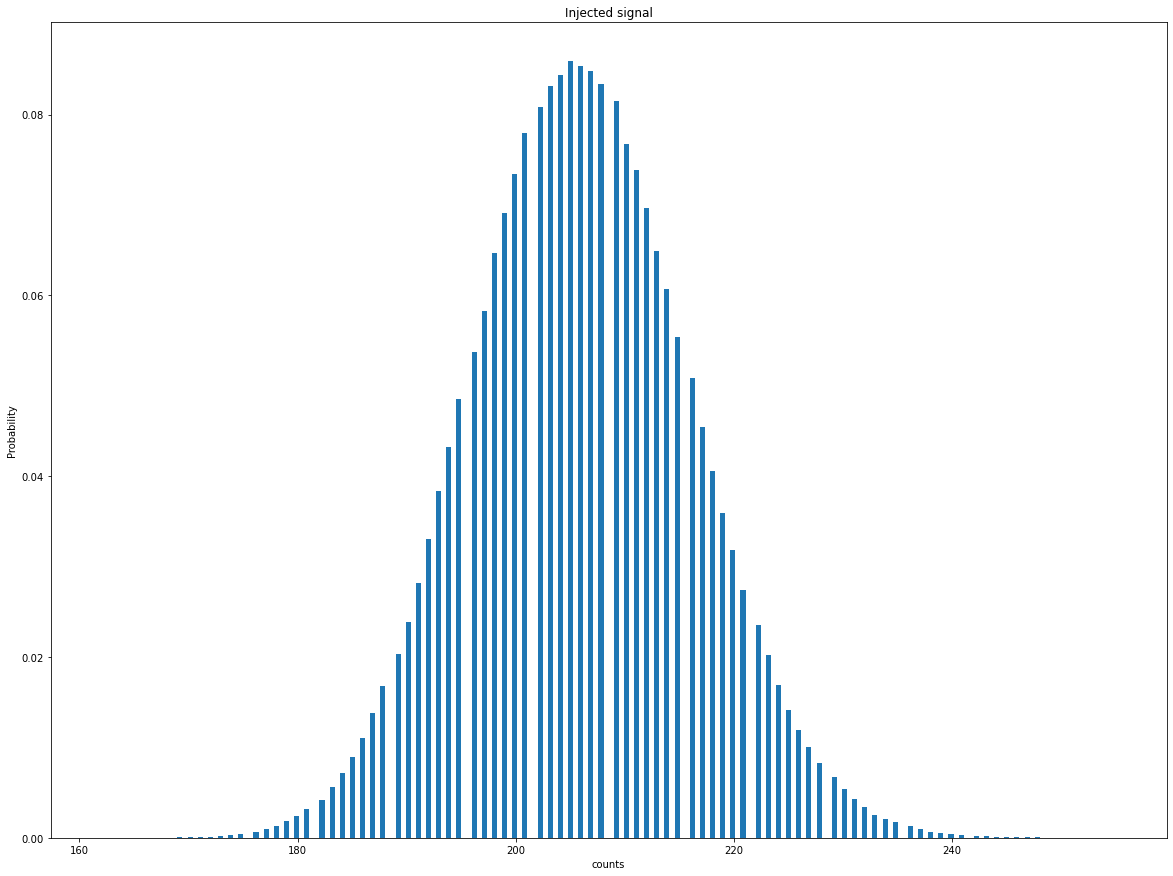

In [47]:
siginal = LHC + injected[300]
plt.hist(siginal, 200,density=True)
plt.title('Injected signal')
plt.xlabel( 'counts')
plt.ylabel('Probability')

c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5LaTeX: \sigmaσ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram. Choose 250 as signal 


Text(0, 0.5, 'Probability')

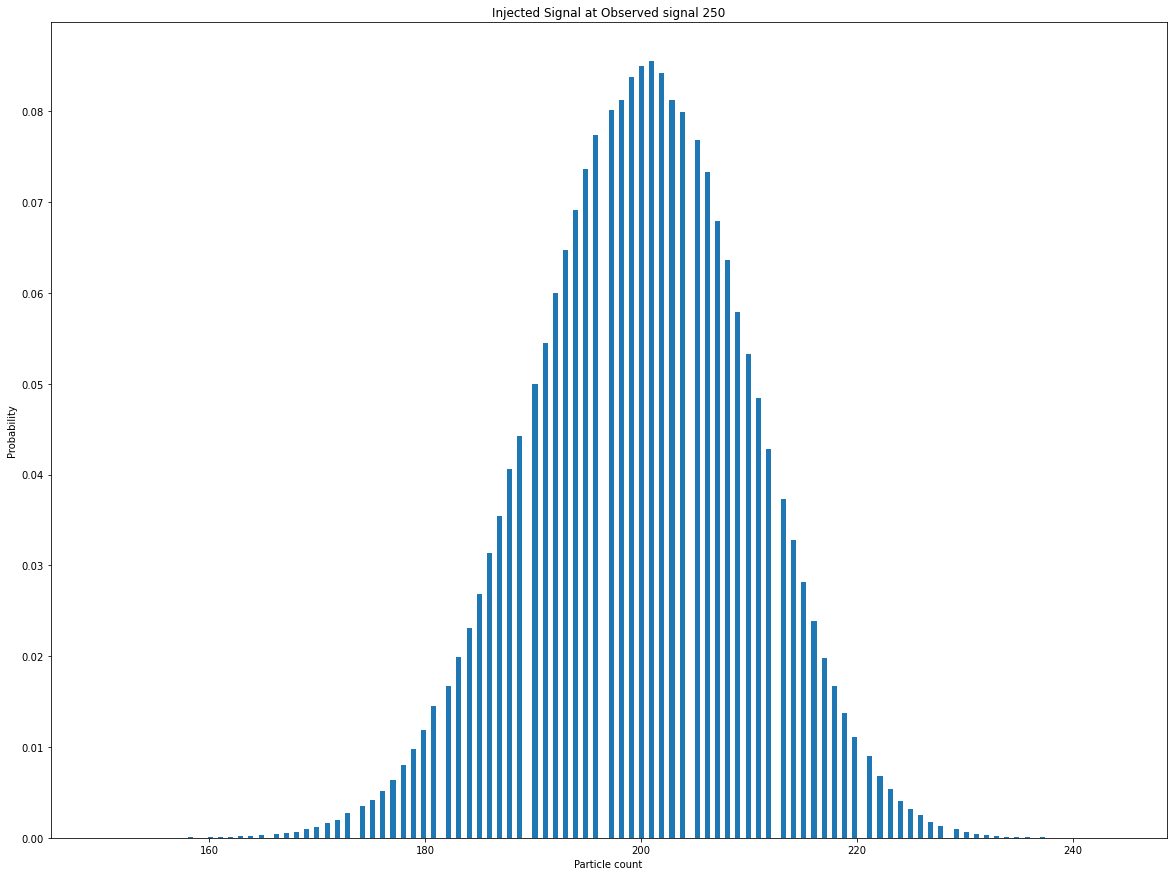

In [48]:
observed_signal = 300
noise = stats.poisson.rvs(mu=100, size=1000000)
observed = np.ones(1000000)*observed_signal
injection = observed - noise
h = plt.hist(injection, bins=200, density=True)
plt.title('Injected Signal at Observed signal 250')
plt.xlabel('Particle count')
plt.ylabel('Probability')

Under the observed signal of 300, the mean of injected signal is about 200 which is consistant with the 2D histogram.

d) For your observed signal, what is the 1LaTeX: \sigmaσ uncertainty on the true signal strength?


In [49]:
mean = injected.mean()
std = injected.std()
up = stats.norm.isf(stats.norm.sf(1), loc=mean, scale=std)
lo = stats.norm.isf(stats.norm.cdf(1), loc=mean, scale=std)
print('upper bound  ' + str(up))
print('lower bound  ' + str(lo))


upper bound  257.7408007103585
lower bound  142.25919928964151


e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?

The observed signal is biased and symmetric.the true injected signal is about 140 - 260 while the observed signal is higher than that,